In [1]:
import urllib.request
with urllib.request.urlopen("http://deeplearning.net/tutorial/code/utils.py") as url:
    response = url.read()
target = open('utils.py', 'w')
target.write(response.decode('utf-8'))
target.close()

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from PIL import Image
from utils import tile_raster_images
import matplotlib.pyplot as plt

In [3]:
v_bias = tf.placeholder('float', [7])
h_bias = tf.placeholder('float', [2])

In [4]:
w = tf.constant(np.random.normal(loc = 0.0, scale = 1.0, size = (7, 2)).astype(np.float32))

In [7]:
sess = tf.Session()
x = tf.constant([[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]])
v_state = x
print('input', sess.run(v_state))
h_bias = tf.constant([0.2, 0.1])
print('hb: ', sess.run(h_bias))
print('w: ', sess.run(w))
h_prob = tf.nn.sigmoid(tf.matmul(v_state, w) + h_bias)
print('p(h|v): ', sess.run(h_prob))
h_state = tf.nn.relu(tf.sign(h_prob - tf.random_uniform(tf.shape(h_prob))))
print('h0 states: ', sess.run(h_state))

input [[1. 0. 0. 1. 0. 0. 0.]]
hb:  [0.2 0.1]
w:  [[-0.66977453 -0.1720476 ]
 [-0.27142283 -0.68606114]
 [-0.5107691   0.23005682]
 [ 0.42924896  1.127393  ]
 [ 1.9810048  -2.0872593 ]
 [-0.4230628  -0.01211898]
 [ 1.0891845   0.3114079 ]]
p(h|v):  [[0.48986998 0.74180007]]
h0 states:  [[1. 1.]]


In [8]:
vb = tf.constant([0.1, 0.2, 0.1, 0.1, 0.1, 0.2, 0.1])
print('b: ', sess.run(vb))
v_prob = sess.run(tf.nn.sigmoid(tf.matmul(h_state, tf.transpose(w)) + vb))
print('p(vi|h): ', v_prob)
v_state = tf.nn.relu(tf.sign(v_prob - tf.random_uniform(tf.shape(v_prob))))
print('v probability states: ', sess.run(v_state))

b:  [0.1 0.2 0.1 0.1 0.1 0.2 0.1]
p(vi|h):  [[0.32260585 0.31919277 0.4549445  0.83978677 0.49843636 0.44147408
  0.81766284]]
v probability states:  [[1. 0. 0. 1. 0. 0. 1.]]


In [9]:
inp = sess.run(x)
print(x)
print(v_prob[0])
v_probability = 1
for el, p in zip(inp[0], v_prob[0]):
    if el == 1:
        v_probability *= p
    else:
        v_probability *= (1 - p)
v_probability

Tensor("Const_4:0", shape=(1, 7), dtype=float32)
[0.32260585 0.31919277 0.4549445  0.83978677 0.49843636 0.44147408
 0.81766284]


0.005135121601531439

In [10]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)
x_train, y_train, x_test, y_test = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [11]:
x_train[1].shape

(784,)

In [12]:
vb = tf.placeholder('float', [784])
hb = tf.placeholder('float', [50])

In [13]:
w = tf.placeholder('float', [784, 50])

In [14]:
v0_state = tf.placeholder('float', [None, 784])

In [16]:
h0_prob = tf.nn.sigmoid(tf.matmul(v0_state, w) + hb)
h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random_uniform(tf.shape(h0_prob))))

In [19]:
v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(w)) + vb) 
v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random_uniform(tf.shape(v1_prob))))

In [20]:
err = tf.reduce_mean(tf.square(v0_state - v1_state))

In [21]:
h1_prob = tf.nn.sigmoid(tf.matmul(v1_state, w) + hb)
h1_state = tf.nn.relu(tf.sign(h1_prob - tf.random_uniform(tf.shape(h1_prob))))

In [23]:
alpha = 0.01
w_delta = tf.matmul(tf.transpose(v0_state), h0_prob) - tf.matmul(tf.transpose(v1_state), h1_prob)
update_w = w + alpha * w_delta
update_vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
update_hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0)

In [24]:
cur_w = np.zeros([784, 50], np.float32)
cur_vb = np.zeros([784], np.float32)
cur_hb = np.zeros([50], np.float32)
prv_w = np.zeros([784, 50], np.float32)
prv_vb = np.zeros([784], np.float32)
prv_hb = np.zeros([50], np.float32)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [25]:
sess.run(err, feed_dict = {v0_state: x_train, w: prv_w, vb: prv_vb, hb: prv_hb})

0.48139247

Epoch: 0 reconstruction error: 0.087152
Epoch: 1 reconstruction error: 0.082891
Epoch: 2 reconstruction error: 0.081651
Epoch: 3 reconstruction error: 0.081134
Epoch: 4 reconstruction error: 0.080965


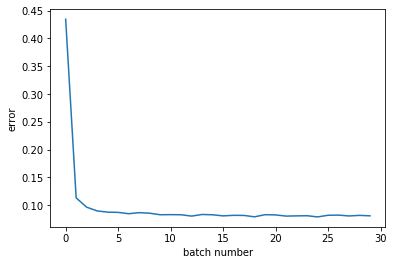

In [29]:
epochs = 5
batch_size = 100
weights = []
errors = []

for epoch in range(epochs):
    for start, end in zip(range(0, len(x_train), batch_size), range(batch_size, len(x_train), batch_size)):
        batch = x_train[start:end]
        cur_w = sess.run(update_w, feed_dict={ v0_state: batch, w: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0_state: batch, w: prv_w, vb: prv_vb, hb: prv_hb})
        cur_hb = sess.run(update_hb, feed_dict={ v0_state: batch, w: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb
        if start % 10000 == 0:
            errors.append(sess.run(err, feed_dict = {v0_state: x_train, w: cur_w, vb: cur_vb, hb: cur_hb}))
            weights.append(cur_w)
    print('Epoch: %d' % epoch, 'reconstruction error: %f' % errors[-1])
plt.plot(errors)
plt.xlabel('batch number')
plt.ylabel('error')
plt.show()

In [30]:
uw = weights[-1].T
print(uw)

[[-0.82343286 -1.0164698  -0.8695649  ... -0.9866267  -0.9197342
  -0.9197402 ]
 [-0.76028216 -0.7721789  -0.71227115 ... -0.75969607 -0.74126744
  -0.76791966]
 [-0.23708156 -0.23047458 -0.23809233 ... -0.26517186 -0.23849803
  -0.21446267]
 ...
 [-0.3779449  -0.38094932 -0.42214185 ... -0.45181018 -0.39928144
  -0.3554327 ]
 [-1.6384125  -1.7082527  -1.6840634  ... -1.5767587  -1.6256353
  -1.6712638 ]
 [-1.5670893  -1.5159016  -1.6149038  ... -1.646359   -1.6837318
  -1.8233783 ]]


In [36]:
tile_raster_images(X = cur_w.T, img_shape = (28, 28), tile_shape = (5, 10), tile_spacing = (1, 1))
image = Image.fromarray(tile_raster_images(x = cur_w.T, img_shape = (28, 28), tile_shape = (5, 10), tile_spacing = (1, 1)))
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

TypeError: tile_raster_images() got an unexpected keyword argument 'x'